In [60]:
import pandas as pd
import sys
import numpy as np
from tqdm import tqdm
import ast 

sys.path.append('../src')
sys.path.append('../Scripts')
from SequenceDataLoader import SequenceDataLoader

sys.path.append('../src')
from Fishnet import Fishnet

# update local libraries automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:
# fishnet = Fishnet.load('../Outputs/Test/fishnet_test.pkl')
DATA = pd.read_csv("../Outputs/Train/urbanization_train.csv")
DATA.drop(columns=["urbanization_rate"], inplace=True)
DATA.rename(
    columns={
        "batch_id": "region_id",
        "year": "label_id",
        "ImageCoordinates": "region_coordinates",
        "urbanization": "target",
    },
    inplace=True,
)
DATA.head()

In [244]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 256
N_CHANNELS = 3
LABELS = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
IMG_DIR = "../Images/Train"
RANDOM_SEED = 42
TARGET_TYPE = "target" # "last-image"

# Initialize the SequenceDataLoader for training data
data_loader = SequenceDataLoader(
    labels=LABELS,
    data=DATA,
    image_dir=IMG_DIR,
    dim=IMG_SIZE,
    batch_size=BATCH_SIZE,
    n_channels=N_CHANNELS,
    random_seed=RANDOM_SEED,
    shuffle=True,
    normalize=True
)

Success. Completed creating batches.


In [245]:
X, Y = data_loader[0]

In [246]:
print(X.shape)
print(Y.shape)

(256, 7, 64, 64, 3)
(256,)


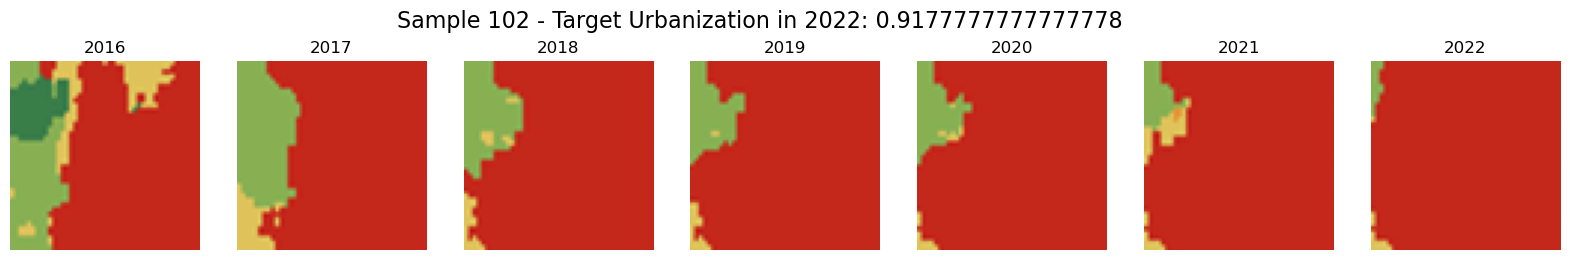

In [247]:
# print 7 images for one specific year for one random sample with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

idx = np.random.randint(0, X.shape[0])
fig, axs = plt.subplots(1, 7, figsize=(20, 3))

fig.suptitle('Sample ' + str(idx) + f" - Target Urbanization in 2022: {Y[idx]}", fontsize=16)

for i in range(7):
    axs[i].imshow(X[idx, i, :, :, :], cmap='gray')
    axs[i].set_title(LABELS[i])
    axs[i].axis('off')
plt.show()